# Visualization of Diversity in Departments

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
plt.rcParams["figure.figsize"] = (20,15)

## Reading Data

In [3]:
# Employee subery subset-3
df_emp_survey = pd.read_csv('subset-3-sous-ensemble-3.csv', encoding='ISO-8859-1')

In [4]:
# responses data from dicionary file responses
df_responses = pd.read_excel('2020-pses-supporting-documentation_document-de-reference-du-saff-2020.xlsx', sheet_name='RESPONSE OPTIONS DE RÉPONSES')

In [5]:
df_emp_survey.head()

,LEVEL1ID,LEVEL2ID,LEVEL3ID,LEVEL4ID,LEVEL5ID,SURVEYR,BYCOND,DESCRIP_E,DESCRIP_F,DEMCODE,...,SCORE100,ANSCOUNT,DEPT_E,DEPT_F,INDICATORID,INDICATORENG,INDICATORFRA,SUBINDICATORID,SUBINDICATORENG,SUBINDICATORFRA
0,0,0,0,0,0,2020,Q115 = 1,Male gender,Genre masculin,2011,...,75,73497,Public Service,Fonction publique,4,WORKPLACE,MILIEU DE TRAVAIL,14,Physical environment and equipment,Environnement physique et équipement
1,1,0,0,0,0,2020,Q115 = 1,Male gender,Genre masculin,2011,...,79,11550,Canada Revenue Agency,Agence du revenu du Canada,4,WORKPLACE,MILIEU DE TRAVAIL,14,Physical environment and equipment,Environnement physique et équipement
2,2,0,0,0,0,2020,Q115 = 1,Male gender,Genre masculin,2011,...,80,5626,Employment and Social Development Canada,Emploi et Développement social Canada,4,WORKPLACE,MILIEU DE TRAVAIL,14,Physical environment and equipment,Environnement physique et équipement
3,3,0,0,0,0,2020,Q115 = 1,Male gender,Genre masculin,2011,...,72,7308,Department of National Defence,Ministère de la Défense nationale,4,WORKPLACE,MILIEU DE TRAVAIL,14,Physical environment and equipment,Environnement physique et équipement
4,4,0,0,0,0,2020,Q115 = 1,Male gender,Genre masculin,2011,...,64,3252,Correctional Service Canada,Service correctionnel Canada,4,WORKPLACE,MILIEU DE TRAVAIL,14,Physical environment and equipment,Environnement physique et équipement


In [6]:
df_emp_survey['INDICATORENG'].unique()

array(['WORKPLACE', 'WORKFORCE', 'EMPLOYEE ENGAGEMENT', 'LEADERSHIP',
       'WORKPLACE WELL-BEING', 'COMPENSATION'], dtype=object)

Looks like some there are english and french duplicates for some of the columns, lets eleminate all french columns as not needed

In [7]:
english_columns = [c for c in df_emp_survey.columns if '_F' not in c and c[-3:] != 'FRA']

In [8]:
len(english_columns), len(df_emp_survey.columns) # there are five columns in french, which are not needed

(30, 35)

In [9]:
df_emp_survey = df_emp_survey[english_columns] # only use english columns

In [10]:
df_emp_survey[english_columns].iloc[100]

LEVEL1ID                                                                          34
LEVEL2ID                                                                           0
LEVEL3ID                                                                           0
LEVEL4ID                                                                           0
LEVEL5ID                                                                           0
SURVEYR                                                                         2020
BYCOND                                                                      Q115 = 2
DESCRIP_E                                                              Female gender
DEMCODE                                                                         2012
QUESTION                                                                         Q01
TITLE_E                            Question 1. I have the tools, technology and e...
ANSWER1                                                          

## Get Bar graphs for each question

In [11]:
len(df_emp_survey['TITLE_E'].unique())

216

In [12]:
df_emp_survey.head(10)

,LEVEL1ID,LEVEL2ID,LEVEL3ID,LEVEL4ID,LEVEL5ID,SURVEYR,BYCOND,DESCRIP_E,DEMCODE,QUESTION,...,MOST_NEGATIVE_OR_LEAST_POSITIVE,AGREE,SCORE5,SCORE100,ANSCOUNT,DEPT_E,INDICATORID,INDICATORENG,SUBINDICATORID,SUBINDICATORENG
0,0,0,0,0,0,2020,Q115 = 1,Male gender,2011,Q01,...,14,81,3.99,75,73497,Public Service,4,WORKPLACE,14,Physical environment and equipment
1,1,0,0,0,0,2020,Q115 = 1,Male gender,2011,Q01,...,10,85,4.14,79,11550,Canada Revenue Agency,4,WORKPLACE,14,Physical environment and equipment
2,2,0,0,0,0,2020,Q115 = 1,Male gender,2011,Q01,...,9,87,4.21,80,5626,Employment and Social Development Canada,4,WORKPLACE,14,Physical environment and equipment
3,3,0,0,0,0,2020,Q115 = 1,Male gender,2011,Q01,...,16,78,3.86,72,7308,Department of National Defence,4,WORKPLACE,14,Physical environment and equipment
4,4,0,0,0,0,2020,Q115 = 1,Male gender,2011,Q01,...,23,67,3.58,64,3252,Correctional Service Canada,4,WORKPLACE,14,Physical environment and equipment
5,5,0,0,0,0,2020,Q115 = 1,Male gender,2011,Q01,...,14,79,3.93,73,3010,Fisheries and Oceans Canada,4,WORKPLACE,14,Physical environment and equipment
6,6,0,0,0,0,2020,Q115 = 1,Male gender,2011,Q01,...,11,83,4.07,77,1613,Health Canada,4,WORKPLACE,14,Physical environment and equipment
7,7,0,0,0,0,2020,Q115 = 1,Male gender,2011,Q01,...,9,86,4.18,80,3975,Public Services and Procurement Canada,4,WORKPLACE,14,Physical environment and equipment
8,8,0,0,0,0,2020,Q115 = 1,Male gender,2011,Q01,...,11,83,4.08,77,1669,Statistics Canada,4,WORKPLACE,14,Physical environment and equipment
9,9,0,0,0,0,2020,Q115 = 1,Male gender,2011,Q01,...,10,85,4.06,77,1349,Agriculture and Agri-Food Canada,4,WORKPLACE,14,Physical environment and equipment


In [13]:
df_emp_survey.groupby("DEPT_E").count()

,LEVEL1ID,LEVEL2ID,LEVEL3ID,LEVEL4ID,LEVEL5ID,SURVEYR,BYCOND,DESCRIP_E,DEMCODE,QUESTION,...,NEUTRAL_OR_MIDDLE_CATEGORY,MOST_NEGATIVE_OR_LEAST_POSITIVE,AGREE,SCORE5,SCORE100,ANSCOUNT,INDICATORID,INDICATORENG,SUBINDICATORID,SUBINDICATORENG
DEPT_E,,,,,,,,,,,,,,,,,,,,,
Administrative Tribunals Support Service of Canada,21600,21600,21600,21600,21600,21600,21600,21600,21600,21600,...,21600,21600,21600,21600,21600,21600,21600,21600,21600,21600
Agriculture and Agri-Food Canada,22180,22180,22180,22180,22180,22180,22180,22180,22180,22180,...,22180,22180,22180,22180,22180,22180,22180,22180,22180,22180
Atlantic Canada Opportunities Agency,19826,19826,19826,19826,19826,19826,19826,19826,19826,19826,...,19826,19826,19826,19826,19826,19826,19826,19826,19826,19826
Canada Border Services Agency,22180,22180,22180,22180,22180,22180,22180,22180,22180,22180,...,22180,22180,22180,22180,22180,22180,22180,22180,22180,22180
Canada Economic Development for Quebec Regions,19409,19409,19409,19409,19409,19409,19409,19409,19409,19409,...,19409,19409,19409,19409,19409,19409,19409,19409,19409,19409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Transportation Safety Board of Canada,18894,18894,18894,18894,18894,18894,18894,18894,18894,18894,...,18894,18894,18894,18894,18894,18894,18894,18894,18894,18894
Treasury Board of Canada Secretariat,21998,21998,21998,21998,21998,21998,21998,21998,21998,21998,...,21998,21998,21998,21998,21998,21998,21998,21998,21998,21998
Veterans Affairs Canada,21998,21998,21998,21998,21998,21998,21998,21998,21998,21998,...,21998,21998,21998,21998,21998,21998,21998,21998,21998,21998


In [14]:
df_emp_survey.query("DEPT_E == 'Administrative Tribunals Support Service of Canada'")['LEVEL1ID'].unique()

array([91], dtype=int64)

In [15]:
len(df_emp_survey['LEVEL1ID'].unique()), len(df_emp_survey['DEPT_E'].unique())

(68, 68)

In [16]:
# get unique values for each columns
uniq_cols = []
for c in df_emp_survey.columns:
    if len(df_emp_survey[c].unique()) > 1:
        uniq_cols.append(c)
        print(c, ": ", len(df_emp_survey[c].unique()))

LEVEL1ID :  68
SURVEYR :  3
BYCOND :  59
DESCRIP_E :  59
DEMCODE :  59
QUESTION :  216
TITLE_E :  216
ANSWER1 :  102
ANSWER2 :  102
ANSWER3 :  88
ANSWER4 :  72
ANSWER5 :  83
ANSWER6 :  75
ANSWER7 :  66
MOST_POSITIVE_OR_LEAST_NEGATIVE :  103
NEUTRAL_OR_MIDDLE_CATEGORY :  87
MOST_NEGATIVE_OR_LEAST_POSITIVE :  99
AGREE :  103
SCORE5 :  367
SCORE100 :  98
ANSCOUNT :  15719
DEPT_E :  68
INDICATORID :  6
INDICATORENG :  6
SUBINDICATORID :  23
SUBINDICATORENG :  23


In [17]:
# looking into score columns

In [18]:
df_emp_survey[uniq_cols].head(5)

,LEVEL1ID,SURVEYR,BYCOND,DESCRIP_E,DEMCODE,QUESTION,TITLE_E,ANSWER1,ANSWER2,ANSWER3,...,MOST_NEGATIVE_OR_LEAST_POSITIVE,AGREE,SCORE5,SCORE100,ANSCOUNT,DEPT_E,INDICATORID,INDICATORENG,SUBINDICATORID,SUBINDICATORENG
0,0,2020,Q115 = 1,Male gender,2011,Q01,"Question 1. I have the tools, technology and e...",35,45,6,...,14,81,3.99,75,73497,Public Service,4,WORKPLACE,14,Physical environment and equipment
1,1,2020,Q115 = 1,Male gender,2011,Q01,"Question 1. I have the tools, technology and e...",41,45,5,...,10,85,4.14,79,11550,Canada Revenue Agency,4,WORKPLACE,14,Physical environment and equipment
2,2,2020,Q115 = 1,Male gender,2011,Q01,"Question 1. I have the tools, technology and e...",45,42,4,...,9,87,4.21,80,5626,Employment and Social Development Canada,4,WORKPLACE,14,Physical environment and equipment
3,3,2020,Q115 = 1,Male gender,2011,Q01,"Question 1. I have the tools, technology and e...",29,48,6,...,16,78,3.86,72,7308,Department of National Defence,4,WORKPLACE,14,Physical environment and equipment
4,4,2020,Q115 = 1,Male gender,2011,Q01,"Question 1. I have the tools, technology and e...",20,46,10,...,23,67,3.58,64,3252,Correctional Service Canada,4,WORKPLACE,14,Physical environment and equipment


In [19]:
cols_to_look = ['DEMCODE',
'QUESTION',
'TITLE_E' ,
'ANSWER1' ,
'ANSWER2' ,
'ANSWER3' ,
'ANSWER4' ,
'ANSWER5' ,
'ANSWER6' ,
'ANSWER7' ,
'MOST_POSITIVE_OR_LEAST_NEGATIVE', 
'NEUTRAL_OR_MIDDLE_CATEGORY',
'MOST_NEGATIVE_OR_LEAST_POSITIVE' ,
'AGREE' ,
'SCORE5' ,
'SCORE100', 
'ANSCOUNT']

In [20]:
df_emp_survey[cols_to_look][:5]

,DEMCODE,QUESTION,TITLE_E,ANSWER1,ANSWER2,ANSWER3,ANSWER4,ANSWER5,ANSWER6,ANSWER7,MOST_POSITIVE_OR_LEAST_NEGATIVE,NEUTRAL_OR_MIDDLE_CATEGORY,MOST_NEGATIVE_OR_LEAST_POSITIVE,AGREE,SCORE5,SCORE100,ANSCOUNT
0,2011,Q01,"Question 1. I have the tools, technology and e...",35,45,6,11,3,0,0,81,6,14,81,3.99,75,73497
1,2011,Q01,"Question 1. I have the tools, technology and e...",41,45,5,8,2,0,0,85,5,10,85,4.14,79,11550
2,2011,Q01,"Question 1. I have the tools, technology and e...",45,42,4,7,2,0,0,87,4,9,87,4.21,80,5626
3,2011,Q01,"Question 1. I have the tools, technology and e...",29,48,6,12,4,0,0,78,6,16,78,3.86,72,7308
4,2011,Q01,"Question 1. I have the tools, technology and e...",20,46,10,15,7,0,0,67,10,23,67,3.58,64,3252


In [21]:
# remove empty records
df_emp_survey = df_emp_survey.query("ANSCOUNT != ' '")

In [22]:
for i in ['ANSWER1','ANSWER2','ANSWER3','ANSWER4','ANSWER5','ANSWER6','ANSWER7', 'ANSCOUNT']:
    df_emp_survey[i] = df_emp_survey[i].astype(int)

In [23]:
# Juefi mentioned this, some of these percenatages are off, by very little
df_emp_survey.eval('ANSWER1 + ANSWER2 + ANSWER3 + ANSWER4 + ANSWER5 + ANSWER6 + ANSWER7')

0          100
1          101
2          100
3           99
4           98
          ... 
1405574    101
1405575    100
1405576    101
1405577    100
1405578     99
Length: 583123, dtype: int32

<AxesSubplot:xlabel='DESCRIP_E'>

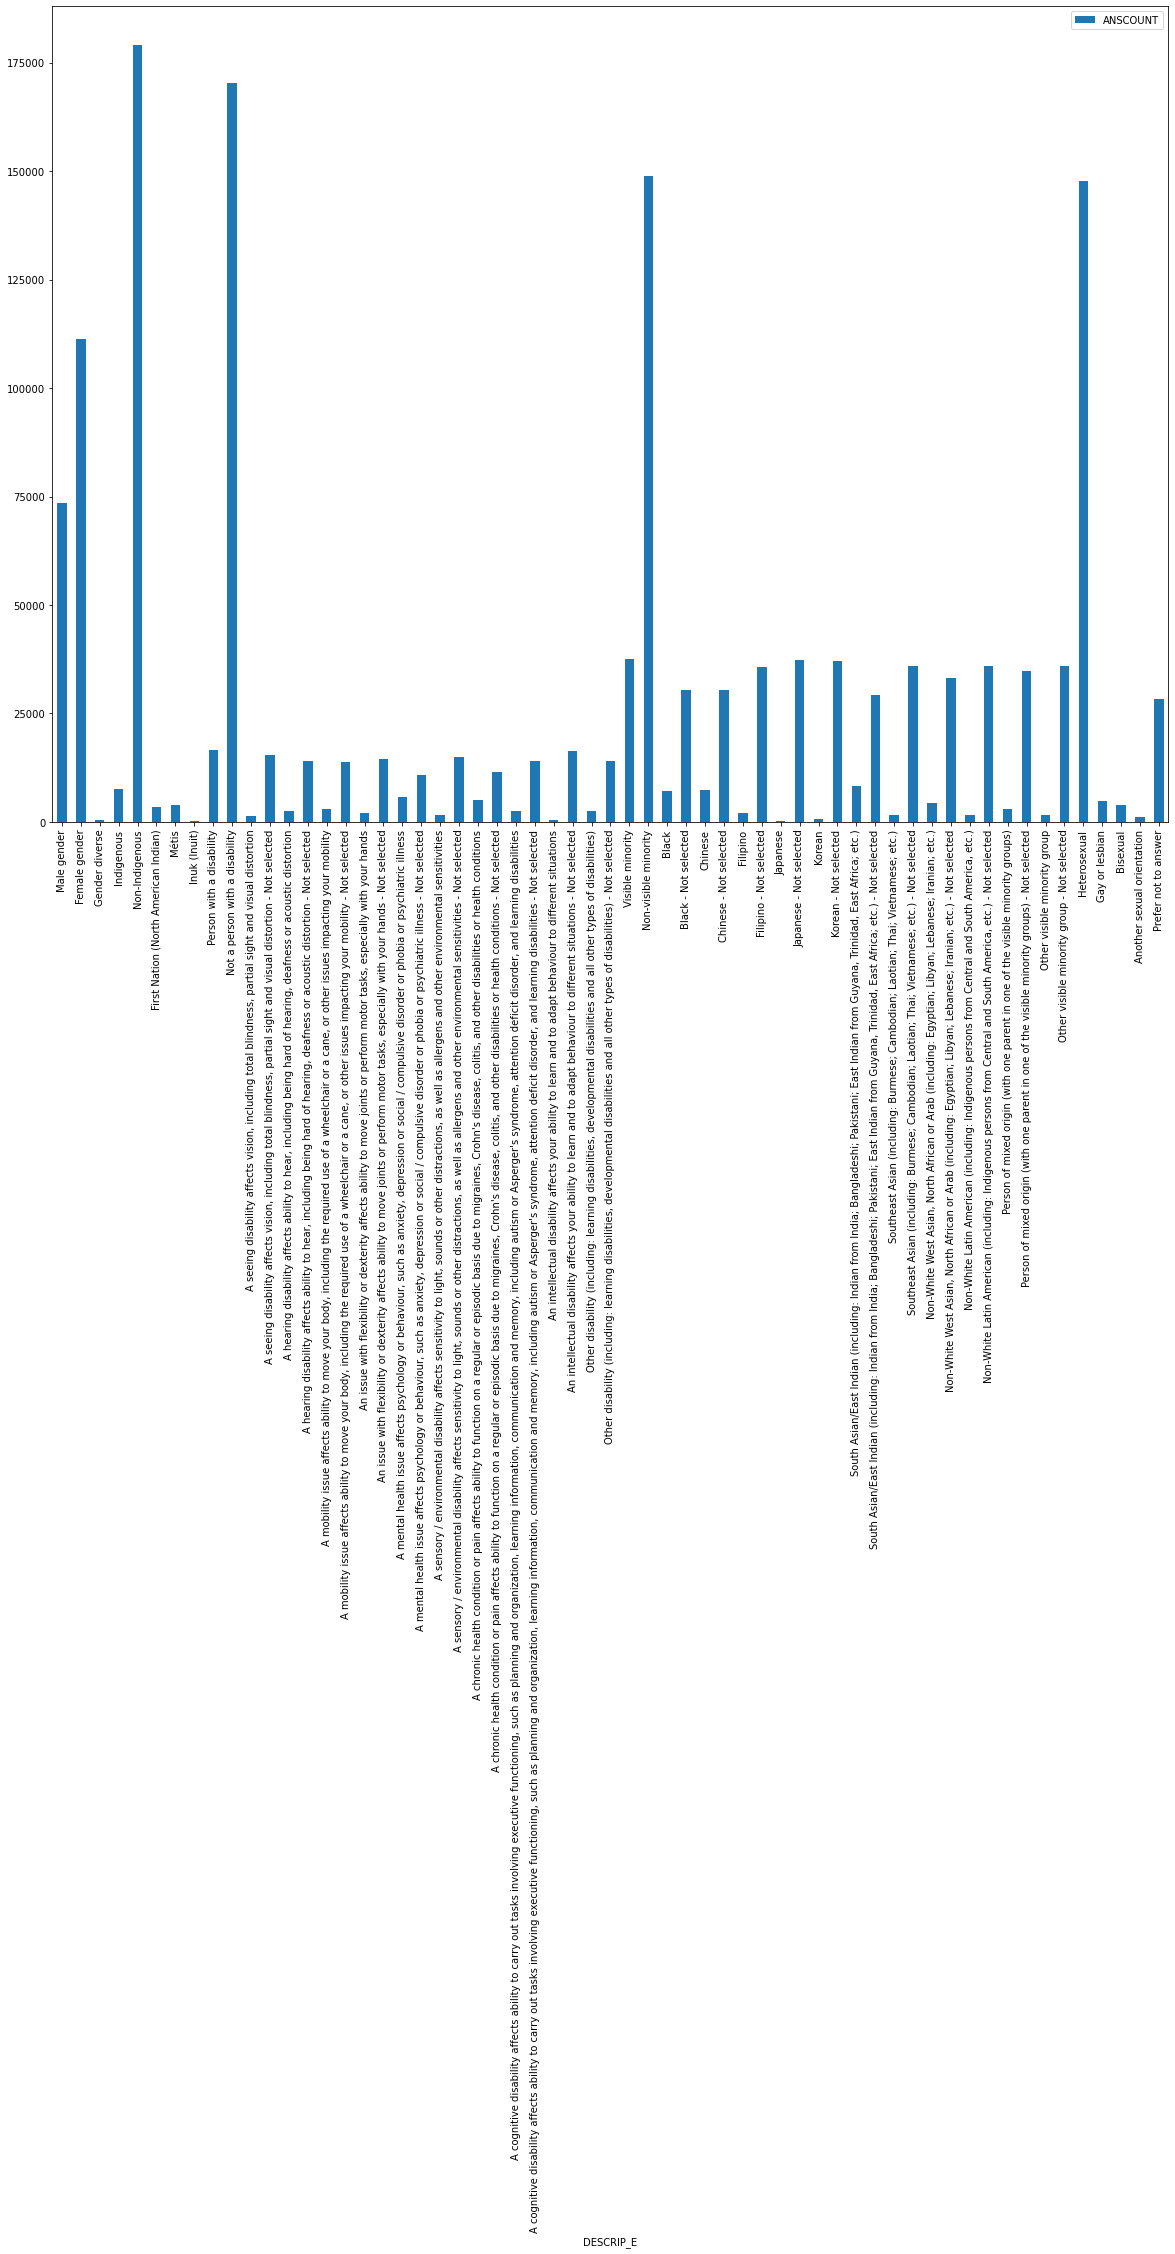

In [24]:
# Number of responses by each demographic code
df_emp_survey.query("SURVEYR == 2020 and QUESTION == 'Q01' and DEPT_E == 'Public Service'")[['DESCRIP_E','ANSCOUNT']].plot.bar(x='DESCRIP_E', y='ANSCOUNT')

There are a lot of problems with these demographics, why there should be different columns or combination of them, there is a column for Male and black, what if the person is black and male?
Also, what is 'Janapense selected' and 'not selected'?
Is there column or connection I am missing or do we have to manually look at data and put them in different categories

In [25]:
df_emp_survey.query("SURVEYR == 2020 and QUESTION == 'Q01' and DEPT_E == 'Public Service'")[['DESCRIP_E','ANSCOUNT']]

,DESCRIP_E,ANSCOUNT
0,Male gender,73497
68,Female gender,111387
136,Gender diverse,372
187,Indigenous,7579
254,Non-Indigenous,179025
321,First Nation (North American Indian),3330
386,Métis,3813
452,Inuk (Inuit),248
483,Person with a disability,16594
550,Not a person with a disability,170409


In [26]:
# Type of work by Demograph
df_emp_survey.query("SURVEYR == 2020")[['DEPT_E','DESCRIP_E']].value_counts().to_dict()

{('Public Service', 'Non-Indigenous'): 216,
 ('Public Service', 'Male gender'): 216,
 ('Public Service', 'Prefer not to answer'): 216,
 ('Public Service', 'Female gender'): 216,
 ('Public Service', 'Visible minority'): 216,
 ('Public Service', 'Heterosexual'): 216,
 ('Public Service', 'Not a person with a disability'): 216,
 ('Public Service', 'Indigenous'): 216,
 ('Correctional Service Canada', 'Heterosexual'): 216,
 ('Canada Revenue Agency', 'Heterosexual'): 216,
 ('Public Service',
  "A chronic health condition or pain affects ability to function on a regular or episodic basis due to migraines, Crohn's disease, colitis, and other disabilities or health conditions - Not selected"): 216,
 ('Public Service',
  "A chronic health condition or pain affects ability to function on a regular or episodic basis due to migraines, Crohn's disease, colitis, and other disabilities or health conditions"): 216,
 ('Public Service', 'Non-visible minority'): 216,
 ('Public Service', 'Person with a disa

In [27]:
uniq_demog = df_emp_survey['DESCRIP_E'].unique()

<AxesSubplot:xlabel='DESCRIP_E'>

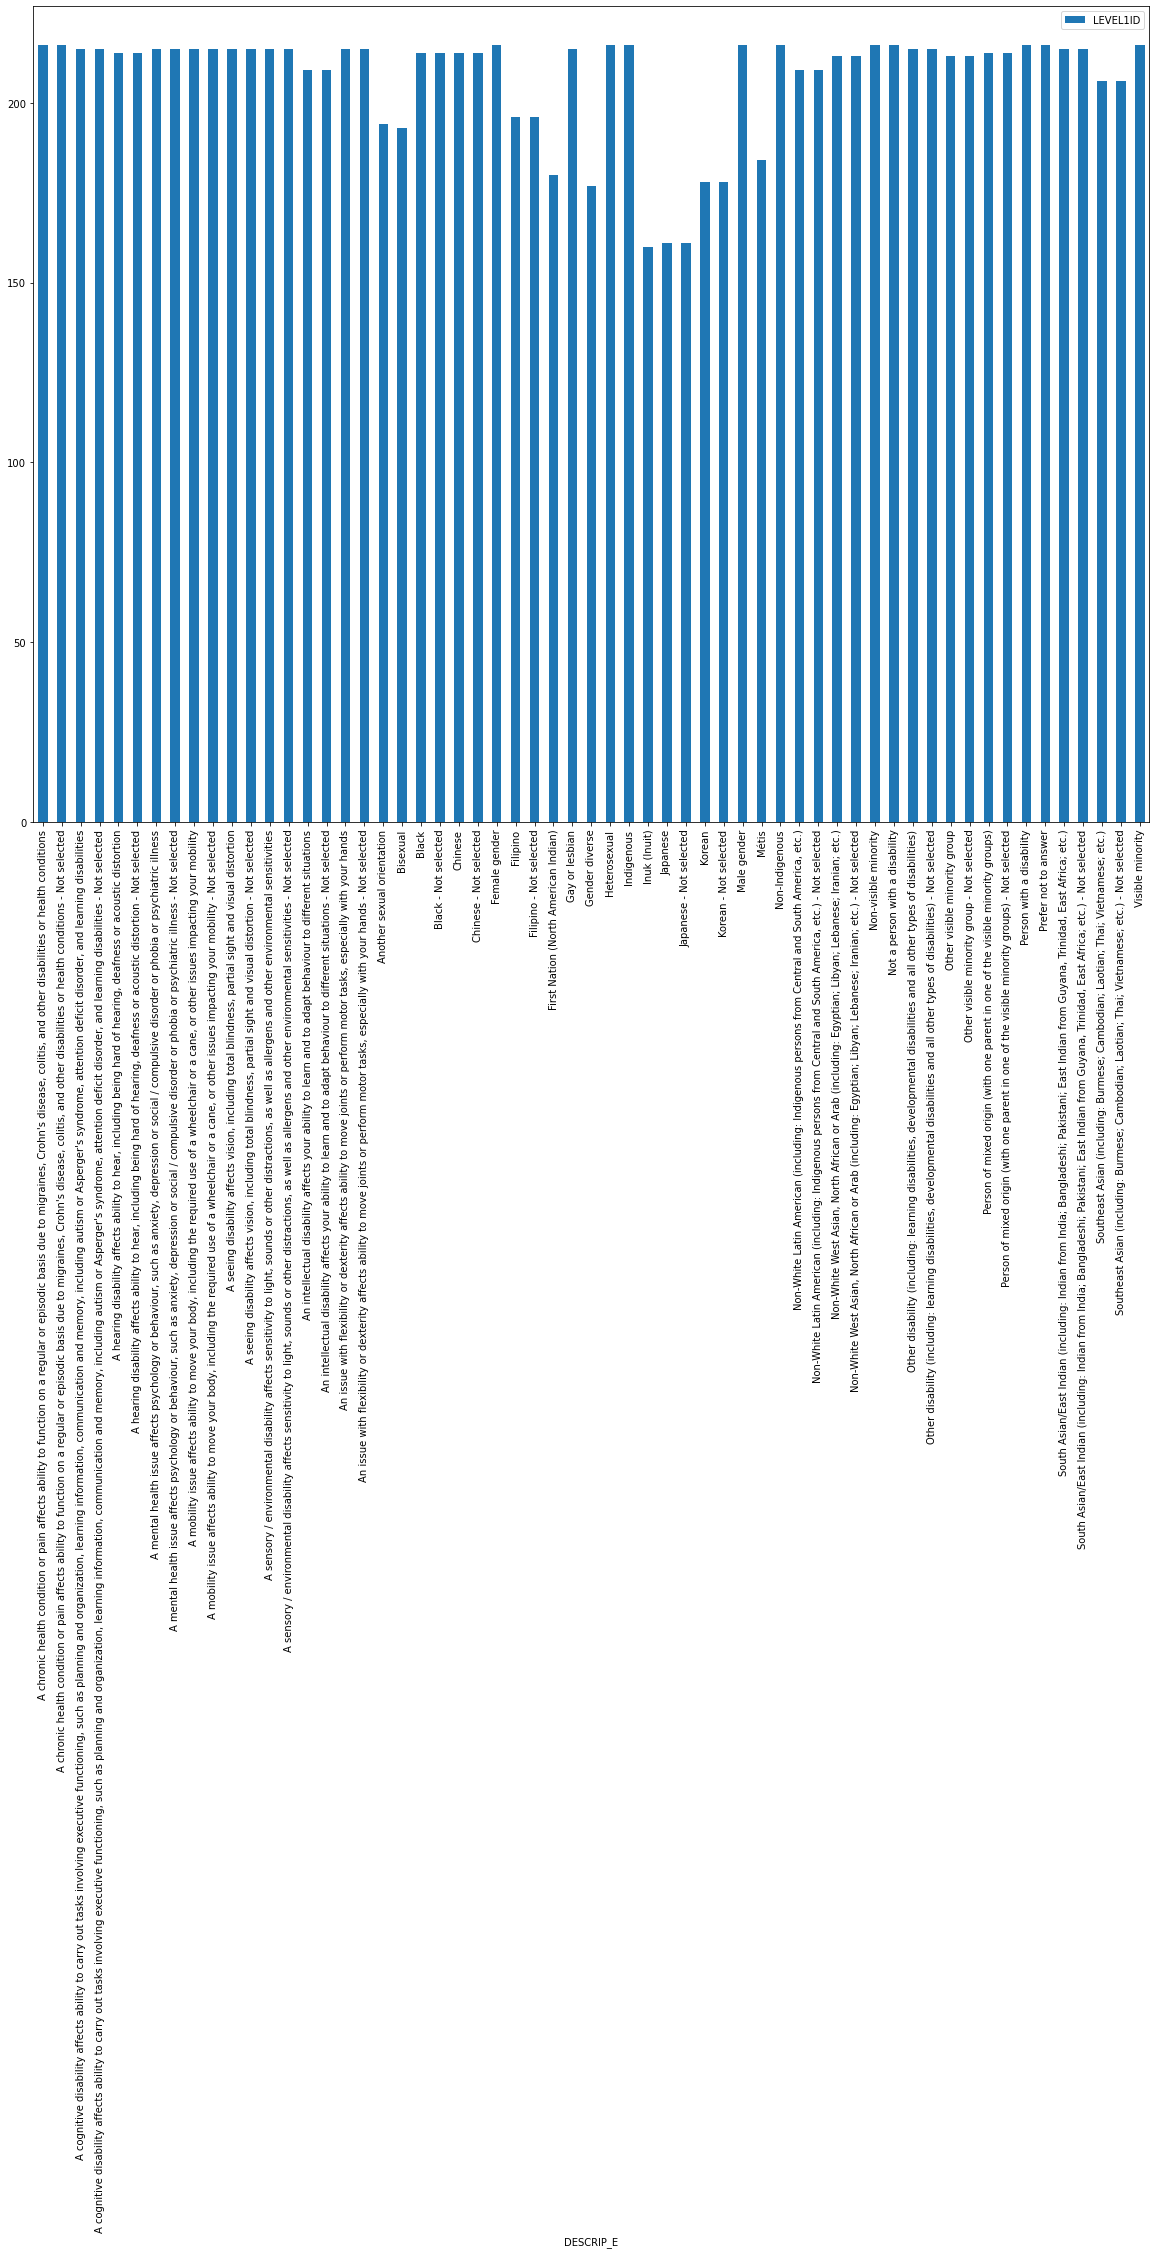

In [28]:
df_emp_survey.query(f"SURVEYR == 2020 and DEPT_E == 'Public Service'").groupby(['DESCRIP_E']).count()[['LEVEL1ID']].plot.bar()

In [29]:
df_emp_survey.query("QUESTION == 'Q62'")[cols_to_look]

,DEMCODE,QUESTION,TITLE_E,ANSWER1,ANSWER2,ANSWER3,ANSWER4,ANSWER5,ANSWER6,ANSWER7,MOST_POSITIVE_OR_LEAST_NEGATIVE,NEUTRAL_OR_MIDDLE_CATEGORY,MOST_NEGATIVE_OR_LEAST_POSITIVE,AGREE,SCORE5,SCORE100,ANSCOUNT
758598,2011,Q62,Question 62. Having carefully read the definit...,7,93,9999,9999,9999,9999,9999,93,9999,7,7,99,9999,73401
758599,2011,Q62,Question 62. Having carefully read the definit...,6,94,9999,9999,9999,9999,9999,94,9999,6,6,99,9999,11545
758600,2011,Q62,Question 62. Having carefully read the definit...,6,94,9999,9999,9999,9999,9999,94,9999,6,6,99,9999,5618
758601,2011,Q62,Question 62. Having carefully read the definit...,5,95,9999,9999,9999,9999,9999,95,9999,5,5,99,9999,7302
758602,2011,Q62,Question 62. Having carefully read the definit...,15,85,9999,9999,9999,9999,9999,85,9999,15,15,99,9999,3226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765678,2069,Q62,Question 62. Having carefully read the definit...,7,93,9999,9999,9999,9999,9999,93,9999,7,7,99,9999,197
765679,2069,Q62,Question 62. Having carefully read the definit...,13,87,9999,9999,9999,9999,9999,87,9999,13,13,99,9999,56
765680,2069,Q62,Question 62. Having carefully read the definit...,0,100,9999,9999,9999,9999,9999,100,9999,0,0,99,9999,35
765682,2069,Q62,Question 62. Having carefully read the definit...,17,83,9999,9999,9999,9999,9999,83,9999,17,17,99,9999,41


In [30]:
df_emp_survey.columns

Index(['LEVEL1ID', 'LEVEL2ID', 'LEVEL3ID', 'LEVEL4ID', 'LEVEL5ID', 'SURVEYR',
       'BYCOND', 'DESCRIP_E', 'DEMCODE', 'QUESTION', 'TITLE_E', 'ANSWER1',
       'ANSWER2', 'ANSWER3', 'ANSWER4', 'ANSWER5', 'ANSWER6', 'ANSWER7',
       'MOST_POSITIVE_OR_LEAST_NEGATIVE', 'NEUTRAL_OR_MIDDLE_CATEGORY',
       'MOST_NEGATIVE_OR_LEAST_POSITIVE', 'AGREE', 'SCORE5', 'SCORE100',
       'ANSCOUNT', 'DEPT_E', 'INDICATORID', 'INDICATORENG', 'SUBINDICATORID',
       'SUBINDICATORENG'],
      dtype='object')

In [31]:
df_emp_survey['BYCOND_1'] = df_emp_survey['BYCOND'].str.split("=").str[0] # take left side of by cond column

In [32]:
df_emp_survey['BYCOND_2'] = df_emp_survey['BYCOND'].str.split("=").str[0].str.extract('(Q[0-9]+)') # take left side of by cond column


In [33]:
uniq_by_cond = df_emp_survey['BYCOND_1'].unique()
uniq_by_cond_2 = df_emp_survey['BYCOND_2'].unique()

In [34]:
ans_cols = ['ANSWER1','ANSWER2','ANSWER3','ANSWER4','ANSWER5','ANSWER6','ANSWER7']

In [35]:
# get men, women and gender diverse answer pools for a question on average across all dept
print("Question :", df_emp_survey.query("QUESTION == 'Q26'")['TITLE_E'].iloc[0])
df_emp_survey.query(f"BYCOND_1 == '{uniq_by_cond[0]}' and QUESTION == 'Q26'").groupby('BYCOND').mean()[ans_cols]

Question : Question 26. I feel that my immediate supervisor supports my career goals.


,ANSWER1,ANSWER2,ANSWER3,ANSWER4,ANSWER5,ANSWER6,ANSWER7
BYCOND,,,,,,,
Q115 = 1,51.750000,23.823529,12.735294,4.470588,4.147059,1.558824,1.558824
Q115 = 2,54.588235,22.573529,11.044118,4.808824,3.514706,1.852941,1.602941
Q115 = 3,44.923077,22.769231,16.000000,5.076923,6.692308,2.538462,1.846154


In [36]:
# get actual responses for each question
def get_responses(q):
    return df_responses.query(f"QUESTION == '{q}'")[['Answer1ENG','Answer2ENG','Answer3ENG','Answer4ENG','Answer5ENG','Answer6ENG','Answer7ENG']].values[0]

# get demographic codes for each question
def get_demo_descrip(demo_codes):
    dict_codes = {}
    for i in demo_codes:
        dict_codes[i] = df_emp_survey.query(f"BYCOND == '{i}'")['DESCRIP_E'].iloc[0]
    return dict_codes

# get data frame results for a question
def get_results(q, demo_code):
    # get men, women and gender diverse answer pools for a question on average across all dept
    idx_cols = get_demo_descrip(df_emp_survey.query(f"BYCOND_2 == '{demo_code}' and QUESTION == '{q}'").groupby('BYCOND').mean()[ans_cols].index)
    df_resp_score = df_emp_survey.query(f"BYCOND_2 == '{demo_code}' and QUESTION == '{q}'").groupby('BYCOND').mean()[ans_cols]
    responses = get_responses(q)

    # replace values
    df_resp_score.rename(index=idx_cols, inplace=True)
    df_resp_score.columns = responses

    return df_resp_score

In [37]:
# all questions selected
questions = ['Q26','Q30','Q40','Q41','Q45','Q53','Q54','Q55','Q60','Q61','Q62','Q67','Q69','Q70c','Q70l','Q70m','Q71','Q72','Q78','Q91']
dict_questions = {}

# dictionary of questions
for q in questions:
    dict_questions[q] = df_emp_survey.query(f"QUESTION == '{q}'")['TITLE_E'].iloc[0]

# COND_1 is demographic code with value on left side e.g. democode -> (Q121A = 2) and cond_1 -> (Q121A) 
dict_demograph = {}
for c in uniq_by_cond:
    dict_demograph[c] = list(df_emp_survey.query(f"BYCOND_1 == '{c}'")['DESCRIP_E'].unique())

# COND_2 is more general than COND_1. democode -> (Q121A = 2) and cond_2 -> (Q121) this helps us group more categories
dict_demograph_2 = {}
for c in uniq_by_cond_2:
    dict_demograph_2[c] = list(df_emp_survey.query(f"BYCOND_2 == '{c}'")['DESCRIP_E'].unique())

In [38]:
dict_questions

{'Q26': 'Question 26. I feel that my immediate supervisor supports my career goals.',
 'Q30': 'Question 30. I am satisfied with the quality of supervision I receive.',
 'Q40': 'Question 40. I feel I can initiate a formal recourse process (e.g., grievance, complaint, appeal) without fear of reprisal.',
 'Q41': 'Question 41. My department or agency does a good job of supporting employee career development.',
 'Q45': 'Question 45. I think that my department or agency respects individual differences (e.g., culture, work styles, ideas, abilities).',
 'Q53': 'Question 53. Do you intend to leave your current position in the next two years?',
 'Q54': 'Question 54. Please indicate your reason for leaving.',
 'Q55': 'Question 55. Having carefully read the definition of harassment, have you been the victim of harassment on the job in the past 12 months?',
 'Q60': 'Question 60. I am satisfied with how matters related to harassment are resolved in my department or agency.',
 'Q61': 'Question 61. My

In [39]:
print(dict_questions['Q70m'])
get_results('Q70m',uniq_by_cond_2[7])

Question 70m. Overall, to what extent do the following factors cause you stress at work? Feeling disconnected from colleagues


,Not at all,To a small extent,To a moderate extent,To a large extent,To a very large extent,Don't know,Not applicable
BYCOND,,,,,,,
Heterosexual,29.865672,30.880597,22.194030,10.820896,5.567164,0.074627,0.343284
Gay or lesbian,27.441860,28.139535,22.465116,12.511628,9.162791,0.116279,0.209302
Bisexual,25.027027,27.513514,23.216216,14.405405,9.756757,0.027027,0.162162
Another sexual orientation,24.423077,27.576923,23.269231,14.346154,9.769231,0.192308,0.576923
Prefer not to answer,25.223881,28.731343,22.910448,13.164179,8.746269,0.432836,0.910448


Question 70m. Overall, to what extent do the following factors cause you stress at work? Feeling disconnected from colleagues


<AxesSubplot:xlabel='BYCOND'>

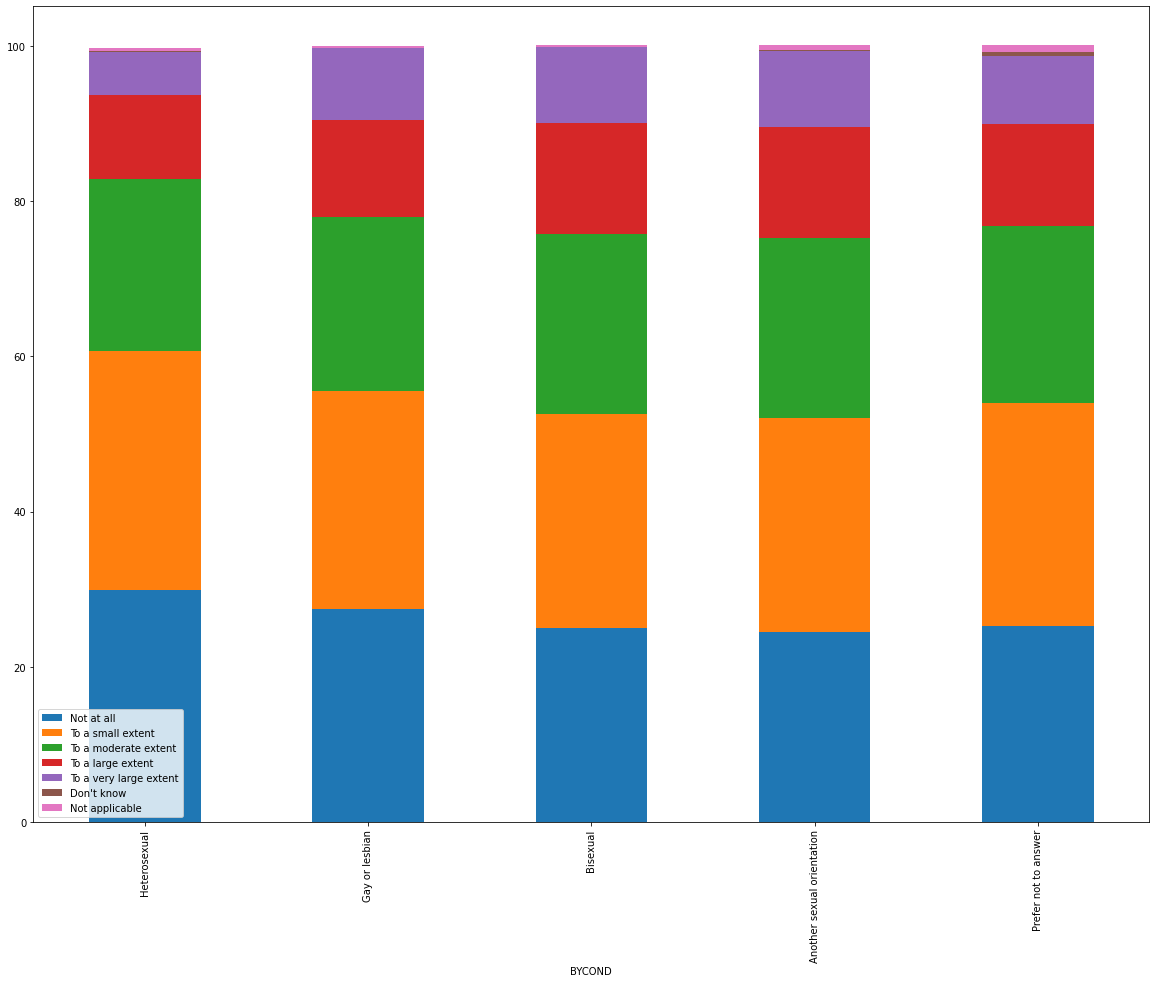

In [40]:
print(dict_questions['Q70m'])
get_results('Q70m',uniq_by_cond_2[7]).plot.bar(stacked=True)

In [41]:
dict_demograph_2

{'Q115': ['Male gender', 'Female gender', 'Gender diverse'],
 'Q116': ['Indigenous', 'Non-Indigenous'],
 'Q117': ['First Nation (North American Indian)', 'Métis', 'Inuk (Inuit)'],
 'Q118': ['Person with a disability', 'Not a person with a disability'],
 'Q119': ['A seeing disability affects vision, including total blindness, partial sight and visual distortion',
  'A seeing disability affects vision, including total blindness, partial sight and visual distortion - Not selected',
  'A hearing disability affects ability to hear, including being hard of hearing, deafness or acoustic distortion',
  'A hearing disability affects ability to hear, including being hard of hearing, deafness or acoustic distortion - Not selected',
  'A mobility issue affects ability to move your body, including the required use of a wheelchair or a cane, or other issues impacting your mobility',
  'A mobility issue affects ability to move your body, including the required use of a wheelchair or a cane, or other 

In [42]:
dict_demograph

{'Q115 ': ['Male gender', 'Female gender', 'Gender diverse'],
 'Q116 ': ['Indigenous', 'Non-Indigenous'],
 'Q117 ': ['First Nation (North American Indian)', 'Métis', 'Inuk (Inuit)'],
 'Q118 ': ['Person with a disability', 'Not a person with a disability'],
 'Q119A ': ['A seeing disability affects vision, including total blindness, partial sight and visual distortion',
  'A seeing disability affects vision, including total blindness, partial sight and visual distortion - Not selected'],
 'Q119B ': ['A hearing disability affects ability to hear, including being hard of hearing, deafness or acoustic distortion',
  'A hearing disability affects ability to hear, including being hard of hearing, deafness or acoustic distortion - Not selected'],
 'Q119C ': ['A mobility issue affects ability to move your body, including the required use of a wheelchair or a cane, or other issues impacting your mobility',
  'A mobility issue affects ability to move your body, including the required use of a whe

In [43]:
# Number of questions by Indicatior and SubIndicator
df_tree_map = df_emp_survey.groupby(['INDICATORENG','SUBINDICATORENG'])[['QUESTION']].count().reset_index()

In [44]:
fig = px.treemap(df_tree_map, path=[px.Constant("Question Types"), 'INDICATORENG', 'SUBINDICATORENG'], values='QUESTION', color='QUESTION'
                                    ,color_continuous_scale='RdBu')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

NameError: name 'px' is not defined

In [54]:
dict_demograph_2

{'Q115': ['Male gender', 'Female gender', 'Gender diverse'],
 'Q116': ['Indigenous', 'Non-Indigenous'],
 'Q117': ['First Nation (North American Indian)', 'Métis', 'Inuk (Inuit)'],
 'Q118': ['Person with a disability', 'Not a person with a disability'],
 'Q119': ['A seeing disability affects vision, including total blindness, partial sight and visual distortion',
  'A seeing disability affects vision, including total blindness, partial sight and visual distortion - Not selected',
  'A hearing disability affects ability to hear, including being hard of hearing, deafness or acoustic distortion',
  'A hearing disability affects ability to hear, including being hard of hearing, deafness or acoustic distortion - Not selected',
  'A mobility issue affects ability to move your body, including the required use of a wheelchair or a cane, or other issues impacting your mobility',
  'A mobility issue affects ability to move your body, including the required use of a wheelchair or a cane, or other 

In [49]:
dict_questions

{'Q26': 'Question 26. I feel that my immediate supervisor supports my career goals.',
 'Q30': 'Question 30. I am satisfied with the quality of supervision I receive.',
 'Q40': 'Question 40. I feel I can initiate a formal recourse process (e.g., grievance, complaint, appeal) without fear of reprisal.',
 'Q41': 'Question 41. My department or agency does a good job of supporting employee career development.',
 'Q45': 'Question 45. I think that my department or agency respects individual differences (e.g., culture, work styles, ideas, abilities).',
 'Q53': 'Question 53. Do you intend to leave your current position in the next two years?',
 'Q54': 'Question 54. Please indicate your reason for leaving.',
 'Q55': 'Question 55. Having carefully read the definition of harassment, have you been the victim of harassment on the job in the past 12 months?',
 'Q60': 'Question 60. I am satisfied with how matters related to harassment are resolved in my department or agency.',
 'Q61': 'Question 61. My

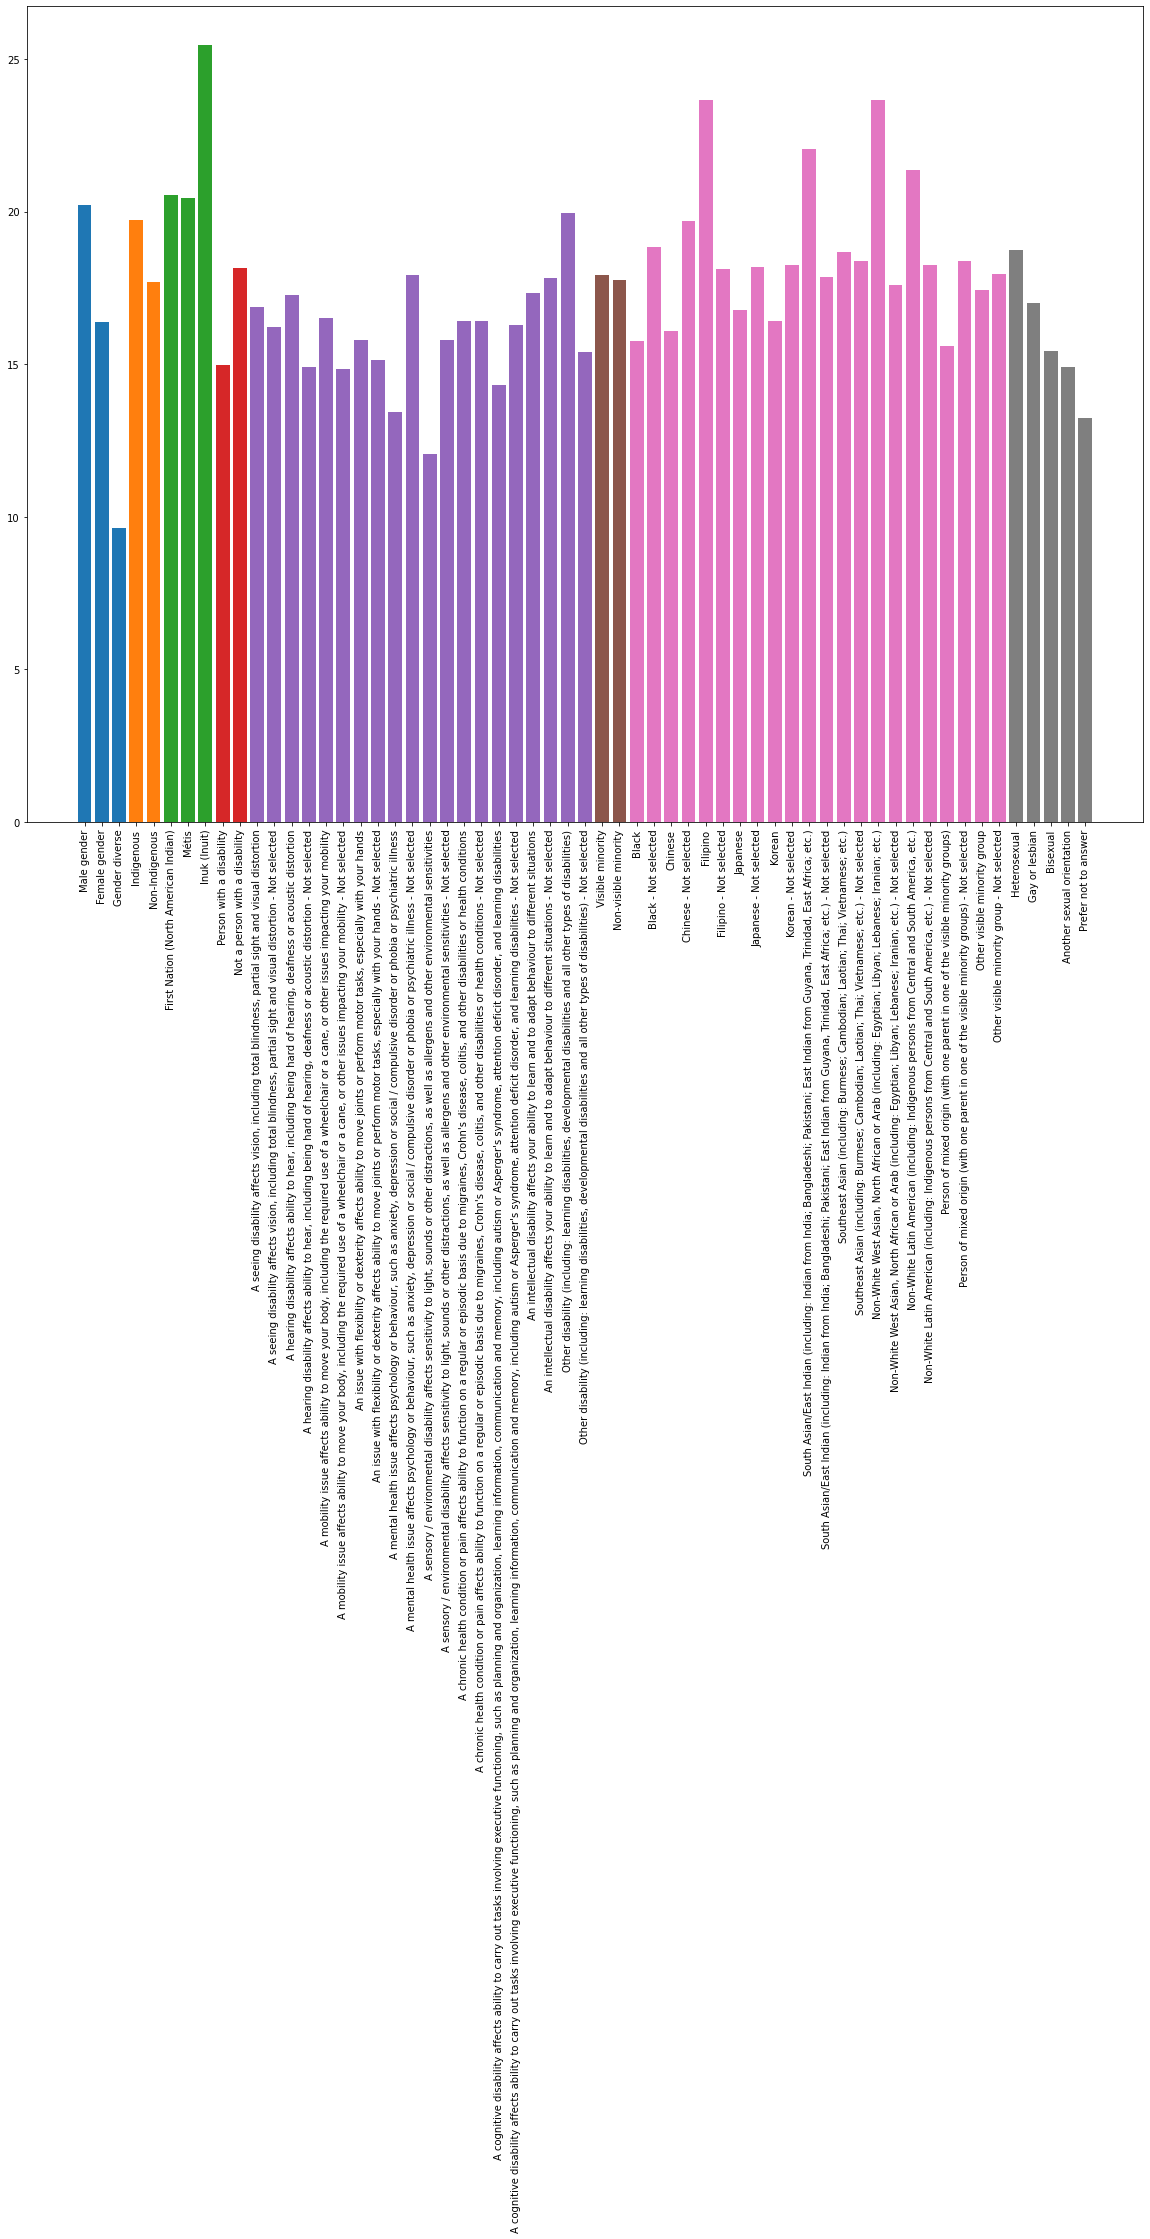

In [72]:
for demo_group in dict_demograph_2.keys():
#     print(demo_group)
    result = get_results('Q60',demo_group)
#     result['Strongly agree'].plot.bar()
    plt.bar(result.index, result['Strongly agree'])
    plt.xticks(rotation=90) 

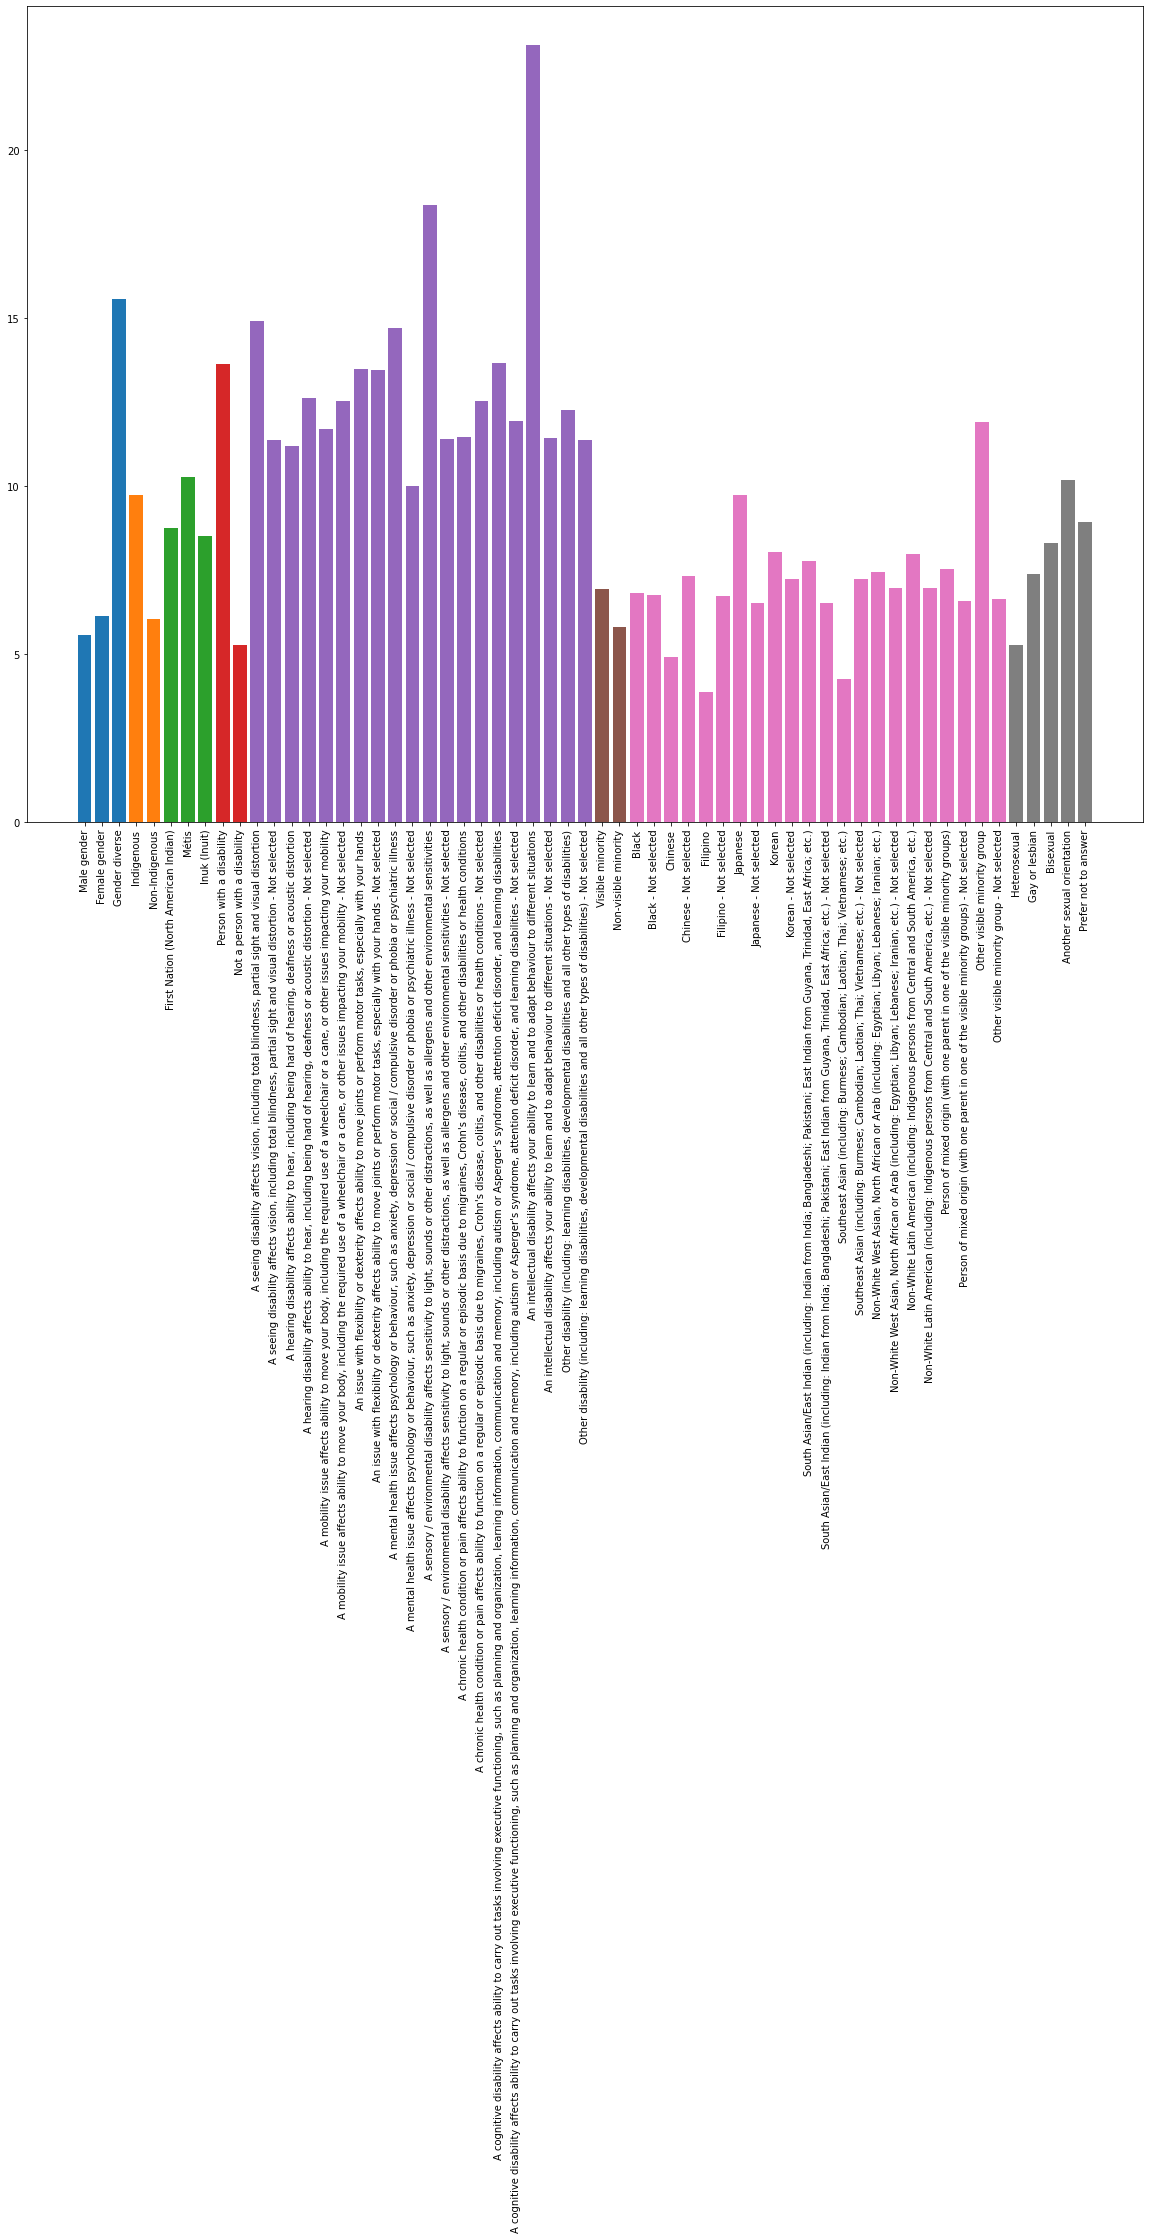

In [73]:

for demo_group in dict_demograph_2.keys():
#     print(demo_group)
    result = get_results('Q60',demo_group)
#     result['Strongly agree'].plot.bar()
    plt.bar(result.index, result['Strongly disagree'])
    plt.xticks(rotation=90) 
#     print(result)
#     for 
#     plt.plot(result.index, result['Strongly agree'])